In [1]:
# Downloading the required libraries
!pip install opencv-python-headless numpy matplotlib


In [2]:
# Step 1: Import Required Libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Step 2: Load and Preprocess the Image
# Load the image
image = cv2.imread('/kaggle/input/chess-dataset/chess4.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for better display in Matplotlib
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert image to grayscale for easier processing


In [4]:
# Step 3: Apply Gaussian Blur to Reduce Noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)



In [5]:
# Step 4: Apply Adaptive Thresholding
thresh = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY_INV, 11, 3
)


In [6]:
# Step 5: Detect Edges and Find Contours
# Perform Canny edge detection on the thresholded image
edges = cv2.Canny(thresh, 100, 200)

# Find contours from the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)



Total number of Black squares: 32
Total number of White squares: 26


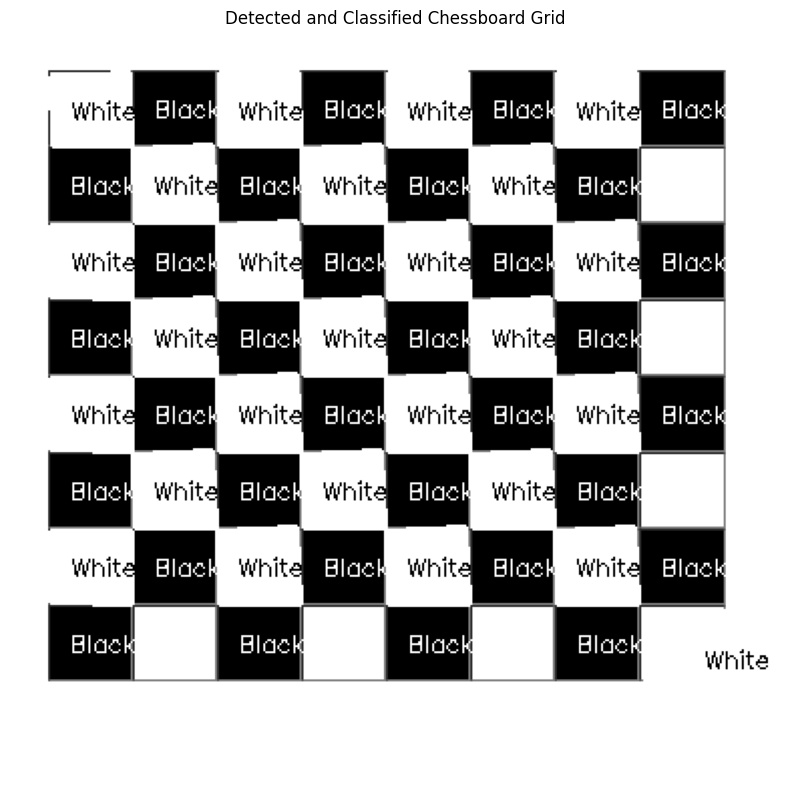

In [7]:
# Step 6: Classify the Squares as Black or White
# Initialize counters for black and white squares
black_count = 0
white_count = 0

# Draw the contours on the original image and classify squares
grid_image = image.copy()

for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour, True)  # Define approximation accuracy
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    if len(approx) == 4:  # Only consider squares (4 sides)
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [approx], -1, 255, thickness=cv2.FILLED)
        square_region = cv2.bitwise_and(image, image, mask=mask)
        mean_color = cv2.mean(square_region, mask=mask)[:3]
        gray_value = np.mean(mean_color)
        
        # Classify squares based on brightness
        if gray_value > 128:
            white_count += 1
            color = (255, 255, 255)  # White color for drawing
            text_color = (0, 0, 0)  # Black text for white square
        else:
            black_count += 1
            color = (0, 0, 0)  # Black color for drawing
            text_color = (255, 255, 255)  # White text for black square

        # Calculate center for text placement
        M = cv2.moments(approx)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
        else:
            cx, cy = approx[0][0]
        
        # Draw contour and label
        cv2.drawContours(grid_image, [approx], -1, color, 2)
        cv2.putText(grid_image, "Black" if gray_value <= 128 else "White", 
                    (cx-10, cy+5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, text_color, 1)

# Print the number of black and white squares
print(f"Total number of Black squares: {black_count}")
print(f"Total number of White squares: {white_count}")


# Display the original image with the detected and classified grid
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(grid_image, cv2.COLOR_BGR2RGB))
plt.title("Detected and Classified Chessboard Grid")
plt.axis('off')
plt.show()